# Developing AQ Sensor Map


In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from pytz import timezone
from datetime import datetime
import cartopy.crs as ccrs
from cartopy.io.img_tiles import Stamen
from cartopy.io.img_tiles import GoogleTiles

import sys
import os
import subprocess
import datetime
import platform

import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.io.img_tiles import StamenTerrain
from cartopy.io.img_tiles import GoogleTiles
from owslib.wmts import WebMapTileService

from matplotlib.path import Path
import matplotlib.patheffects as PathEffects
import matplotlib.patches as mpatches

import numpy as np


## Basemaps to Cartopy 

Previously we used basemaps. Basemap is on its way out.

Previous code:

```python
latMin = 11.7
latMax = 12.2
lonMin = -86.7
lonMax = -86.0
bmap = Basemap(llcrnrlon=lonMin, llcrnrlat=latMin,
               urcrnrlon=lonMax, urcrnrlat=latMax)
esri_url = \
    "http://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/export?\
bbox=%s,%s,%s,%s&\
bboxSR=%s&\
imageSR=%s&\
size=%s,%s&\
dpi=%s&\
format=png32&\
f=image" %\
    (bmap.llcrnrlon, bmap.llcrnrlat, bmap.urcrnrlon, bmap.urcrnrlat,
     bmap.epsg, bmap.epsg, xpixels, bmap.aspect * xpixels, 96)
ESRIimg = mpimg.imread(esri_url)
```


In [49]:
# Basic Plot Open Street map

In [50]:
# Station lat lonts
fname = '../aqtools/information.csv'
data = pd.read_csv(fname)

Stations = data.StationName

towns = (' El Panama', ' Rigoberto', ' Pacaya', ' El Crucero',
         ' La Concepcion', ' Masaya', ' San Marcos',' Jinotepe')
townCoords = ((-86.2058, 11.972), (-86.2021, 11.9617), (-86.3013, 11.9553),
              (-86.3113, 11.9923), (-86.189772, 11.936161),
              (-86.096053, 11.973523), (-86.20317, 11.906584),
              (-86.19993, 11.85017))
volcCoords = (-86.1608, 11.9854)

from matplotlib.font_manager import FontProperties
font = FontProperties()
font.set_weight('bold')
font.set_family('monospace')

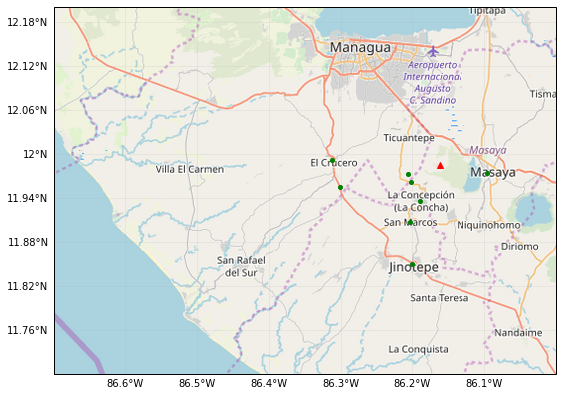

In [69]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import cartopy.io.img_tiles as cimgt

extent = [-86.7, -86.0, 11.7, 12.2]
request = cimgt.OSM()

fig = plt.figure(figsize=(9, 13))
ax = plt.axes(projection=request.crs)
gl = ax.gridlines(draw_labels=True, alpha=0.2)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

#ax.set_extent(extent)
ax.set_extent(extent)
ax.add_image(request, 10, interpolation='spline36')
for i, town in enumerate(towns):
    ax.plot(townCoords[i][0], townCoords[i]
                         [1], 'og', markersize=4, transform=ccrs.Geodetic())
ax.plot(volcCoords[0], volcCoords[1], '^r', markersize=6, transform=ccrs.Geodetic())
plt.show()

In [2]:
SName = ["SanJu1", "ElCrucero", "SanJuan2", "785150", "Pacaya", "Rigoberto",
         "861150", "Met", "ElPanama"]
myFmt = DateFormatter("%Y %b ")
myFmtday = DateFormatter("%d ")
def plotTSNO2(StationName, month=1, year=2016, ymax=100):
    pname = '../data/' + StationName + '/AQMeshData*_2016*.csv'
    for rw in glob.iglob(pname):
        day_data = pd.read_csv(rw)
        NO2 = day_data[day_data.SensorLabel == 'NO2']
        SO2 = day_data[day_data.SensorLabel == 'SO2']
        NO2_valid = NO2[NO2.Status == 'Valid']
        SO2_valid = SO2[SO2.Status == 'Valid']
        allNO2 = NO2_valid.reset_index(drop=True)
        allSO2 = SO2_valid.reset_index(drop=True)
    allNO2['TBTimestamp'] = pd.to_datetime(allNO2['TBTimestamp'])
    allNO2['TBTimestamp'].apply(lambda x: datetime.replace(x, tzinfo=None))
    allNO2['date'] = allNO2['TBTimestamp'].apply(lambda x: x.strftime("%Y %b"))
    allSO2['TBTimestamp'] = pd.to_datetime(allNO2['TBTimestamp'])
    allSO2['TBTimestamp'].apply(lambda x: datetime.replace(x, tzinfo=None))
    allSO2['date'] = allSO2['TBTimestamp'].apply(lambda x: x.strftime("%Y %b"))
    T1 = datetime(year, month, 1, 0, 0, 0).replace(tzinfo=None)
    if month == 12:
        T2 = datetime(year, month, 31, 0, 0, 0).replace(tzinfo=None)
    else:
        T2 = datetime(year, month +1, 1, 0, 0, 0).replace(tzinfo=None)
    plt.figure(figsize=(30, 10))
    ax = plt.gca()
    ax.set_title(StationName+r' NO$_2$ and SO$_2$' + '\n', fontsize=48)
    if not allNO2.empty:
        allNO2.plot.line(x='TBTimestamp', y='Scaled', ax=ax, color='b')
        ax.set_xlim([T1, T2])
        ax.set_ylabel('NO$_2$', fontsize=48, color='b')
        ax.tick_params(axis='both', which='major', labelsize=48)
        ax.tick_params(axis='y', which='major', labelsize=48, colors='b')
        ax.xaxis.set_major_formatter(myFmtday)
        ax.xaxis_date()
        ax.set_xlabel(T1.strftime('%b %Y'), fontsize=48)
        ax2 = ax.twinx()
        allSO2.plot.line(x='TBTimestamp', y='Scaled', ax=ax2, color='g')
        ax2.set_xlim([T1, T2])
        ax2.xaxis_date()
        ax2.xaxis.set_major_formatter(myFmtday)
        ax2.tick_params(axis='y', which='major', labelsize=48, colors='g')
        ax2.set_ylabel('SO$_2$', fontsize=48, color='g')
        plt.tight_layout()
        ax2.get_legend().remove()
        ax.get_legend().remove()
        plt.savefig('../plots/'+str(StationName)+'/'+str(T1.strftime('%b_%Y'))+'.png')
    return

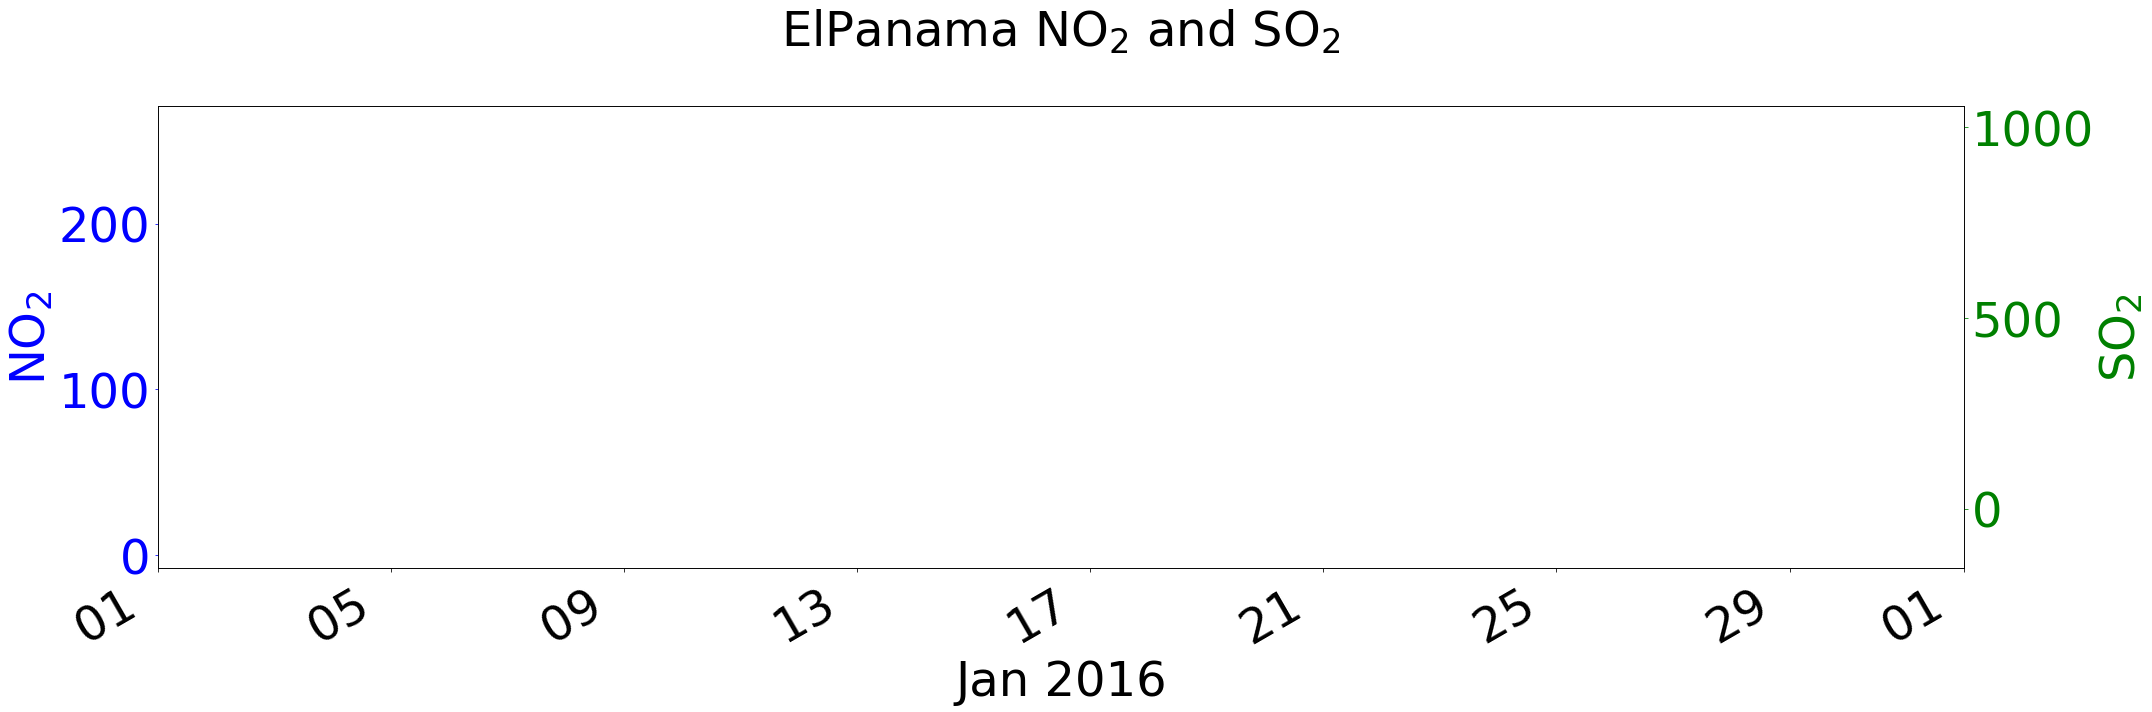

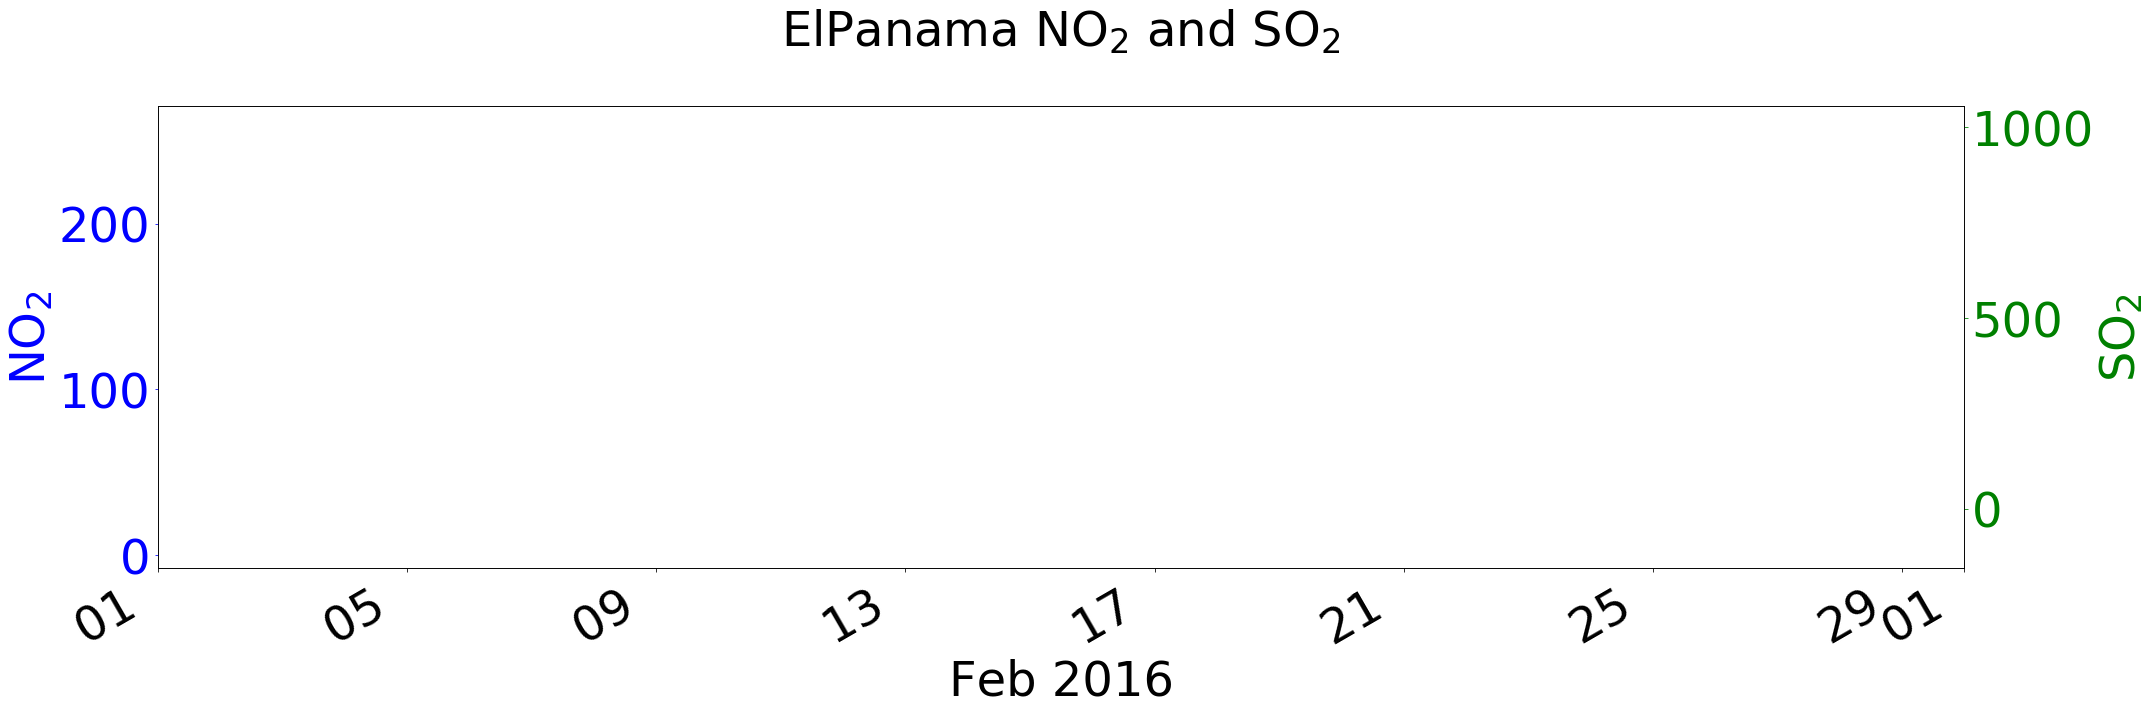

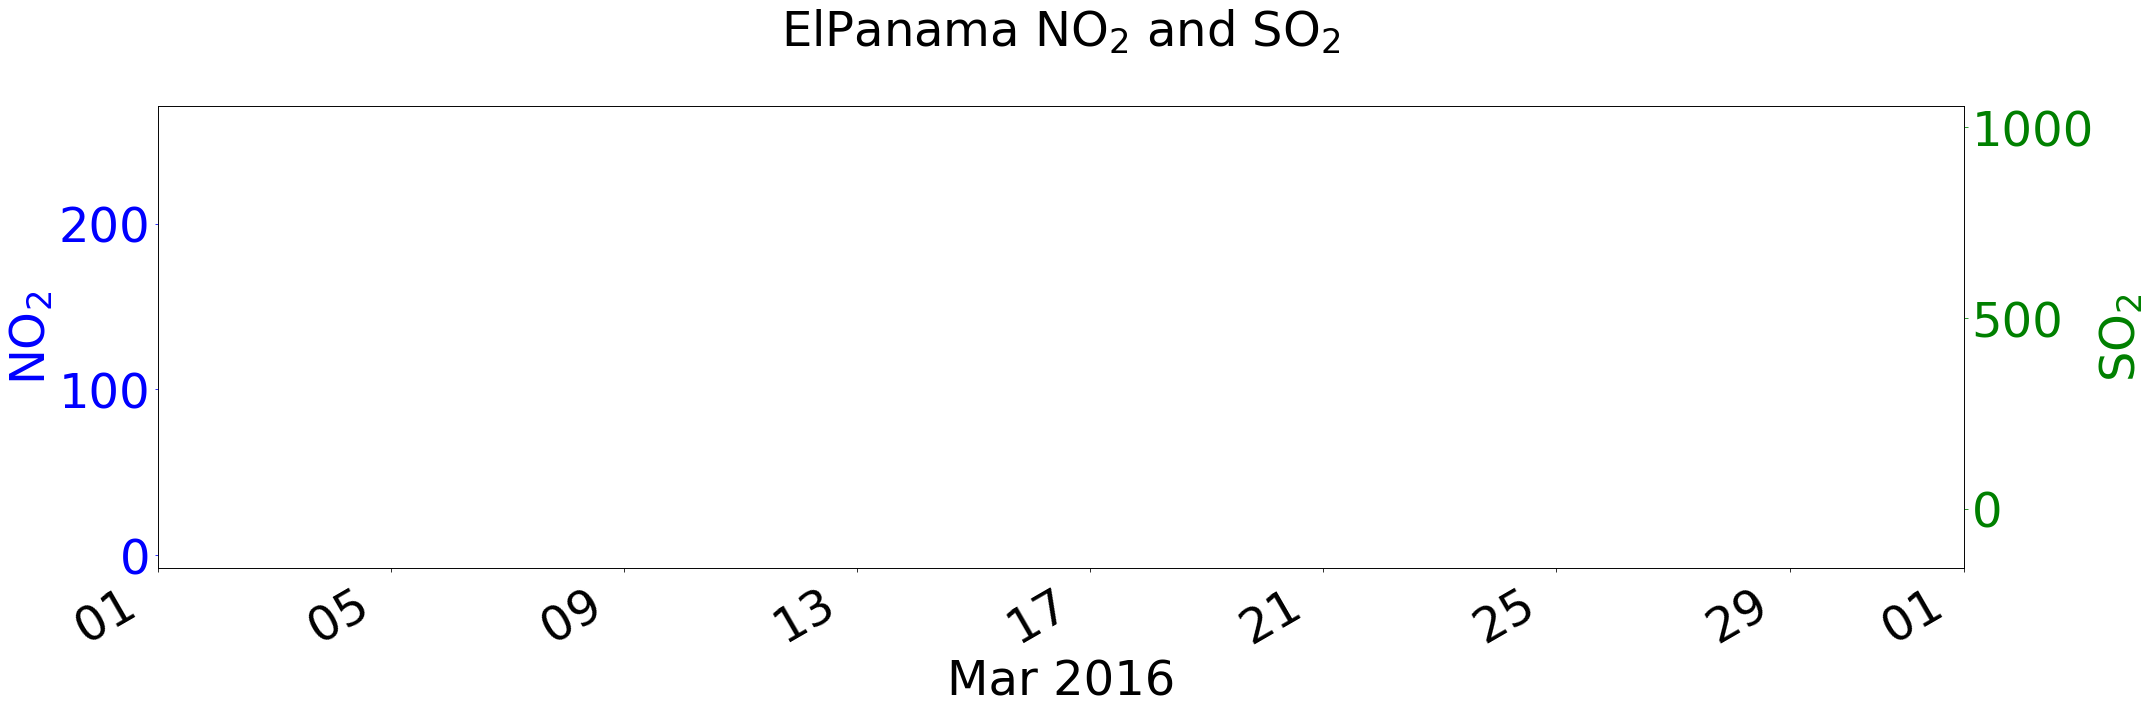

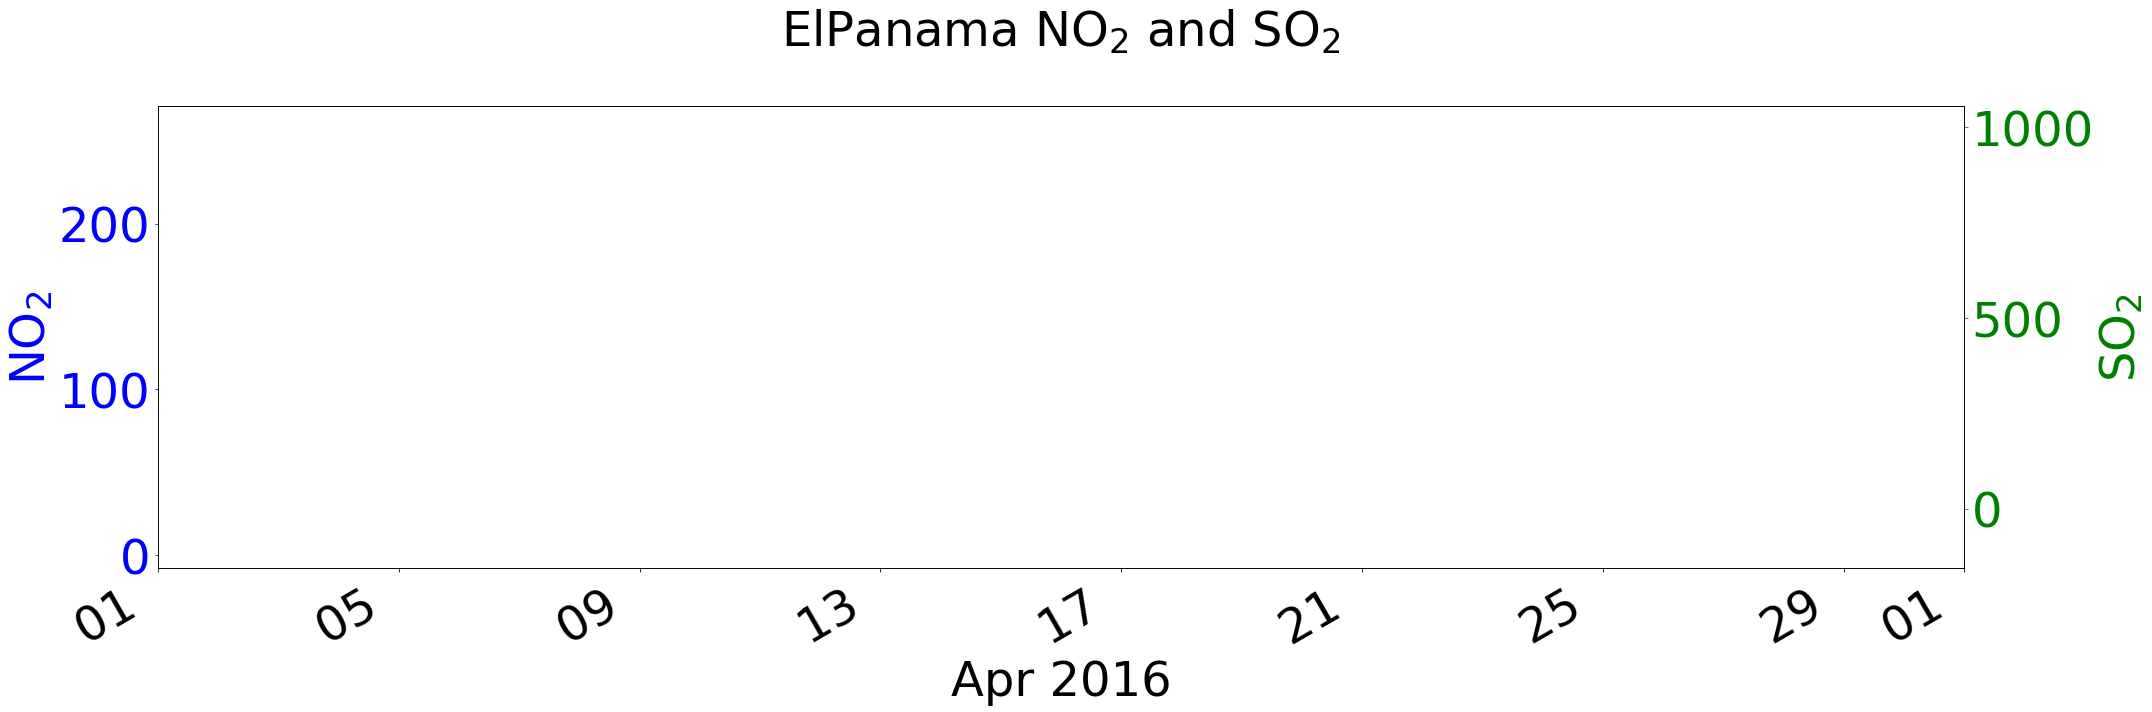

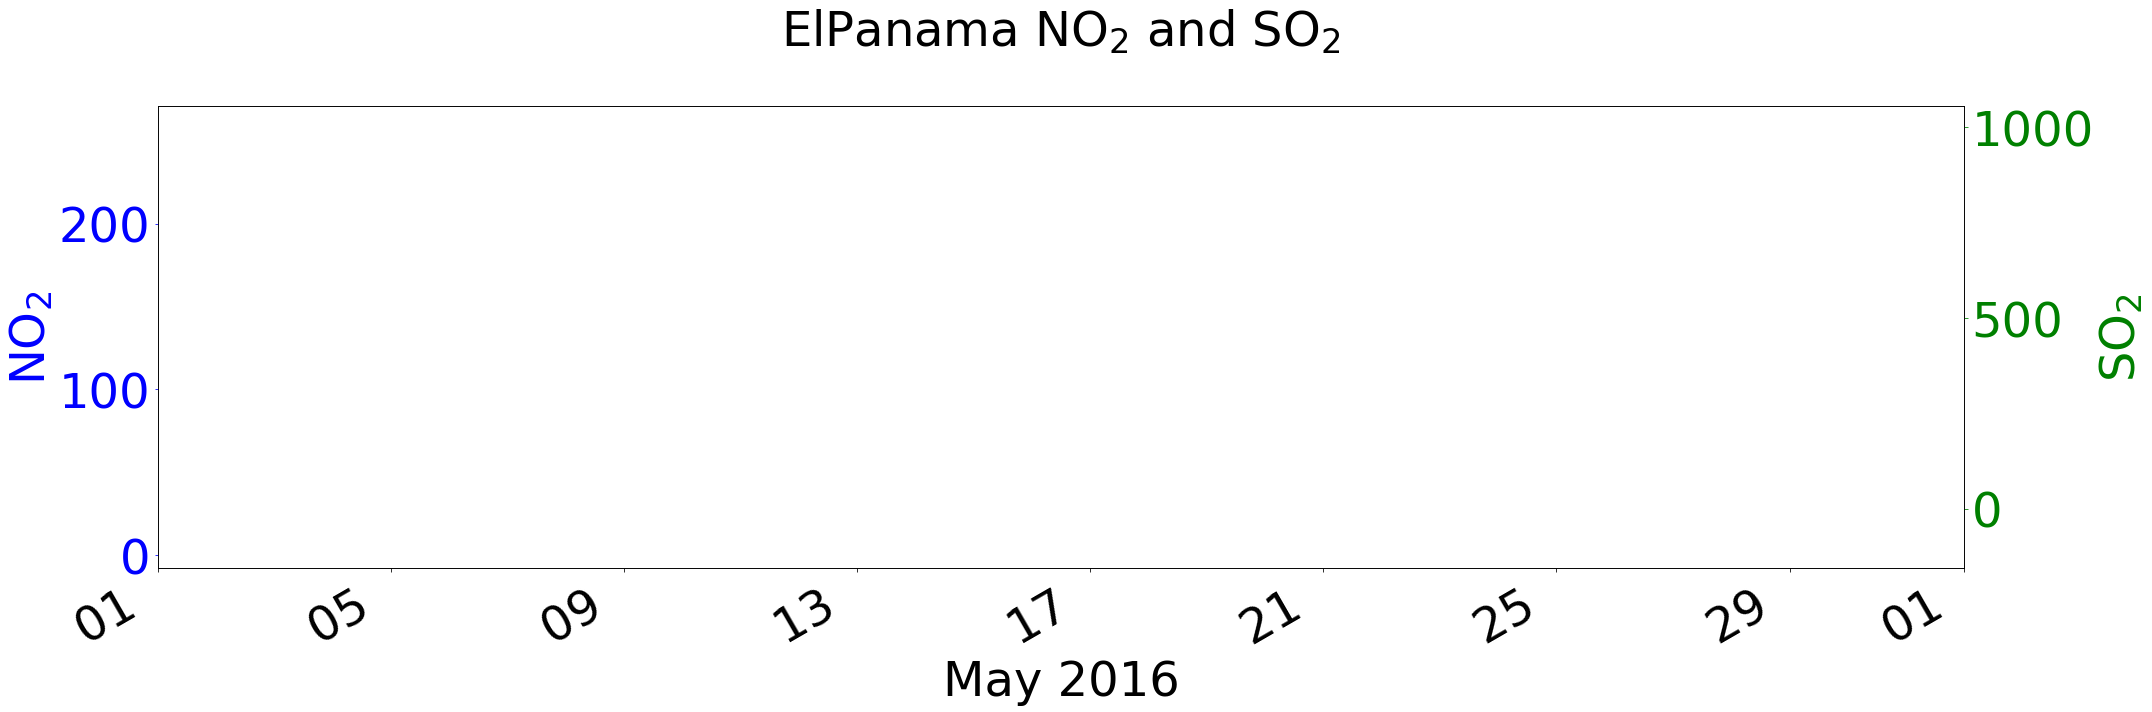

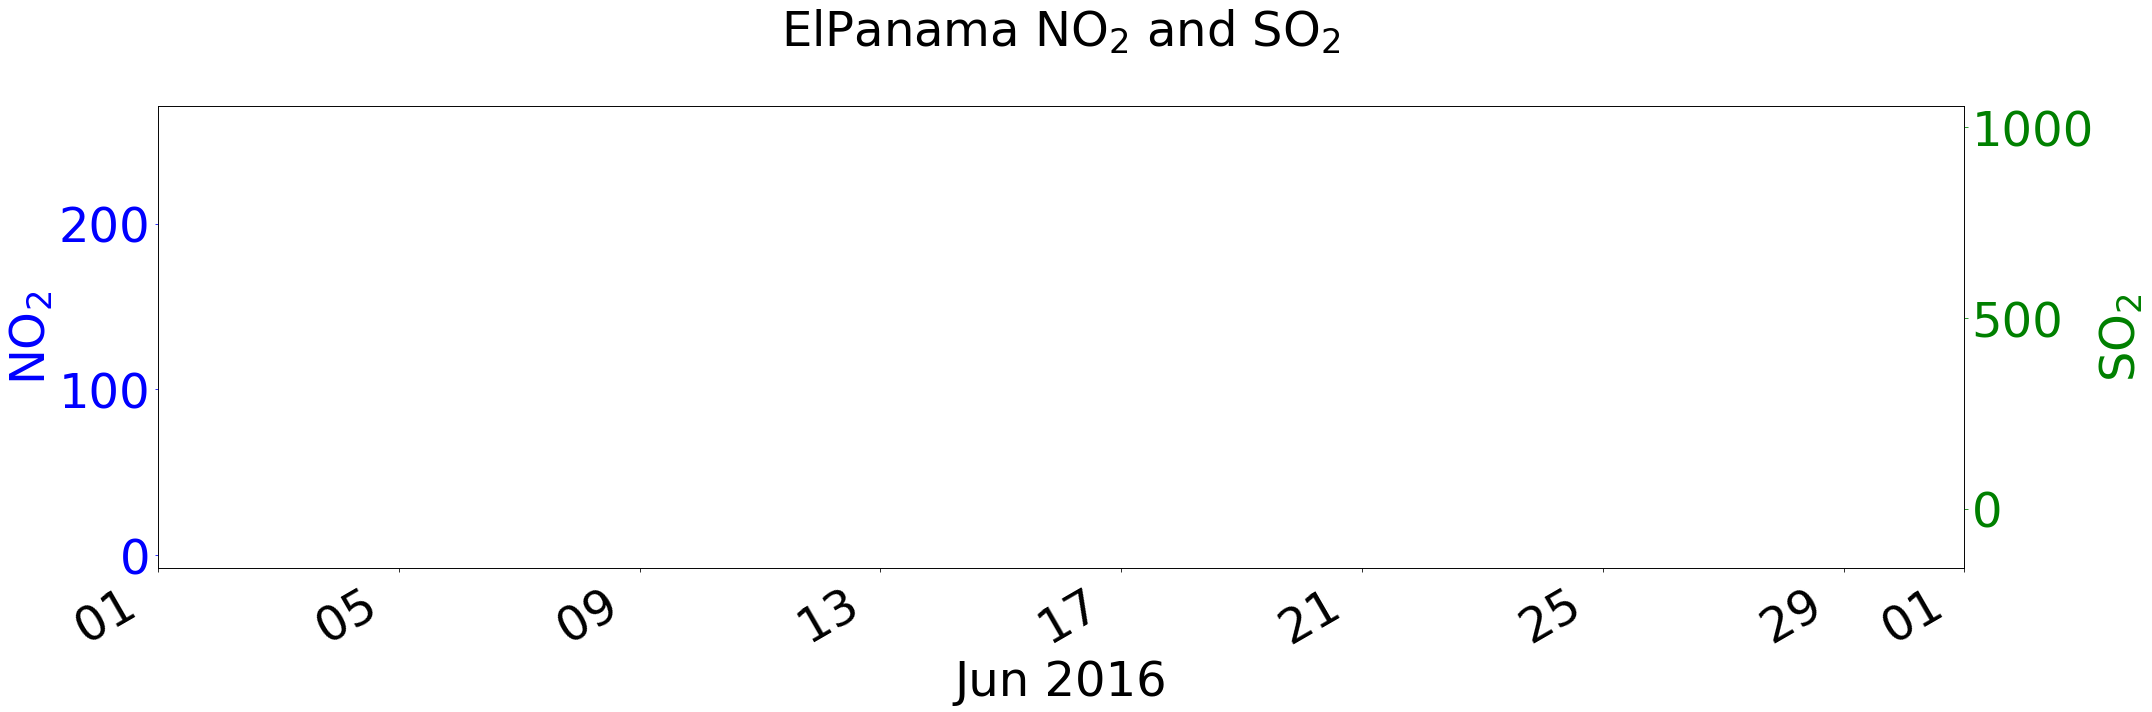

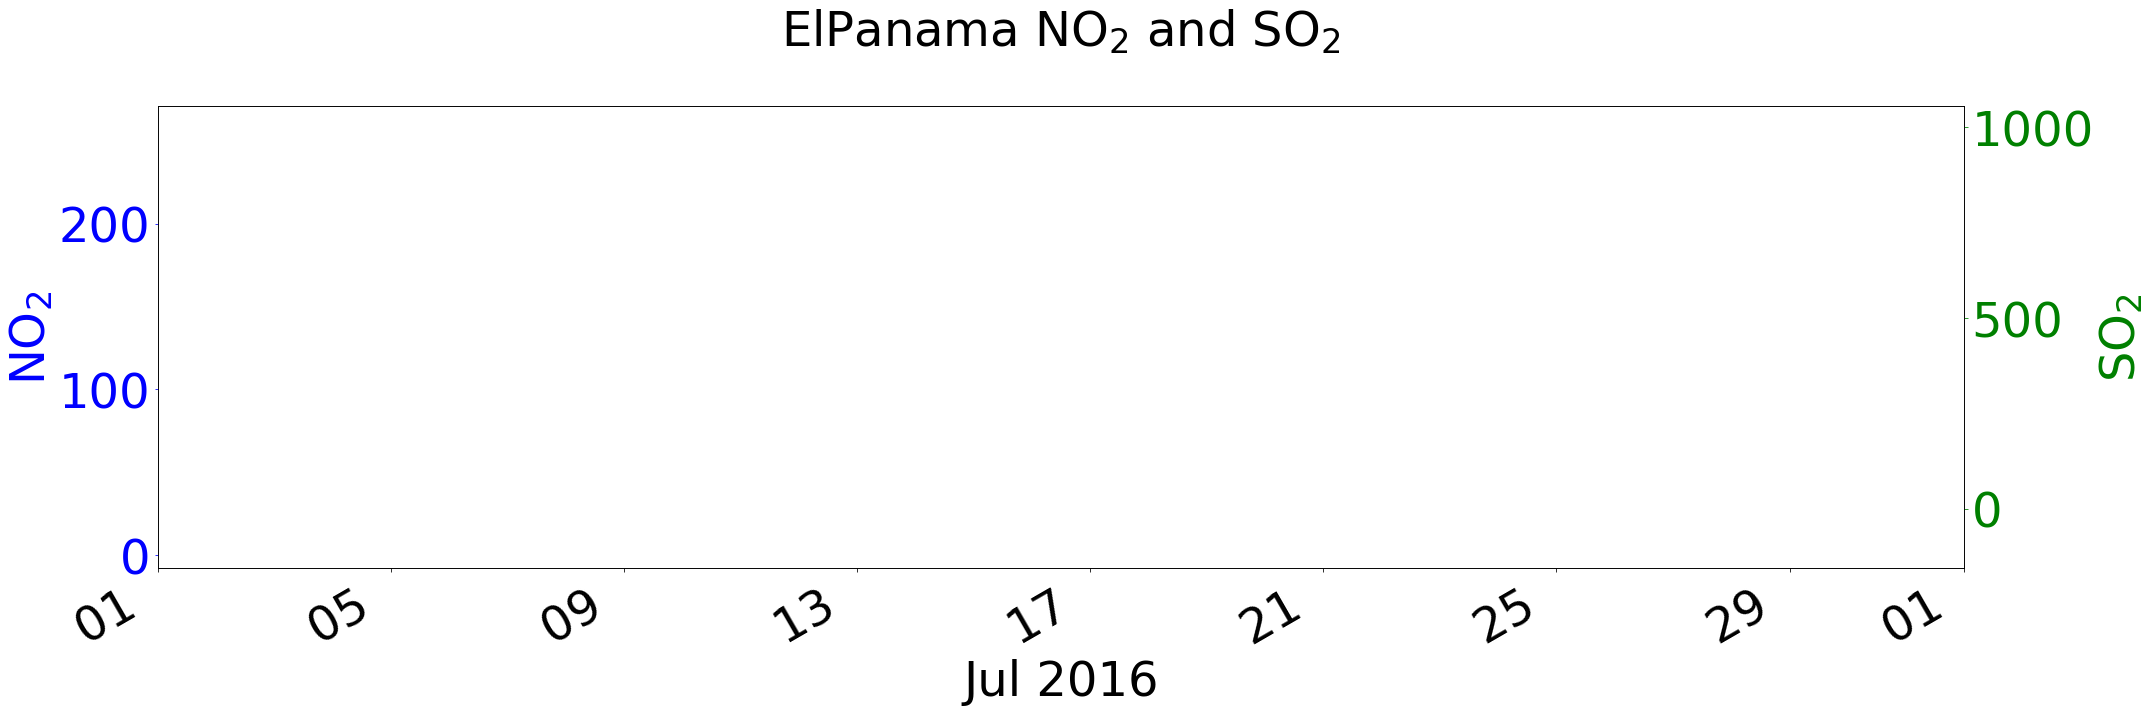

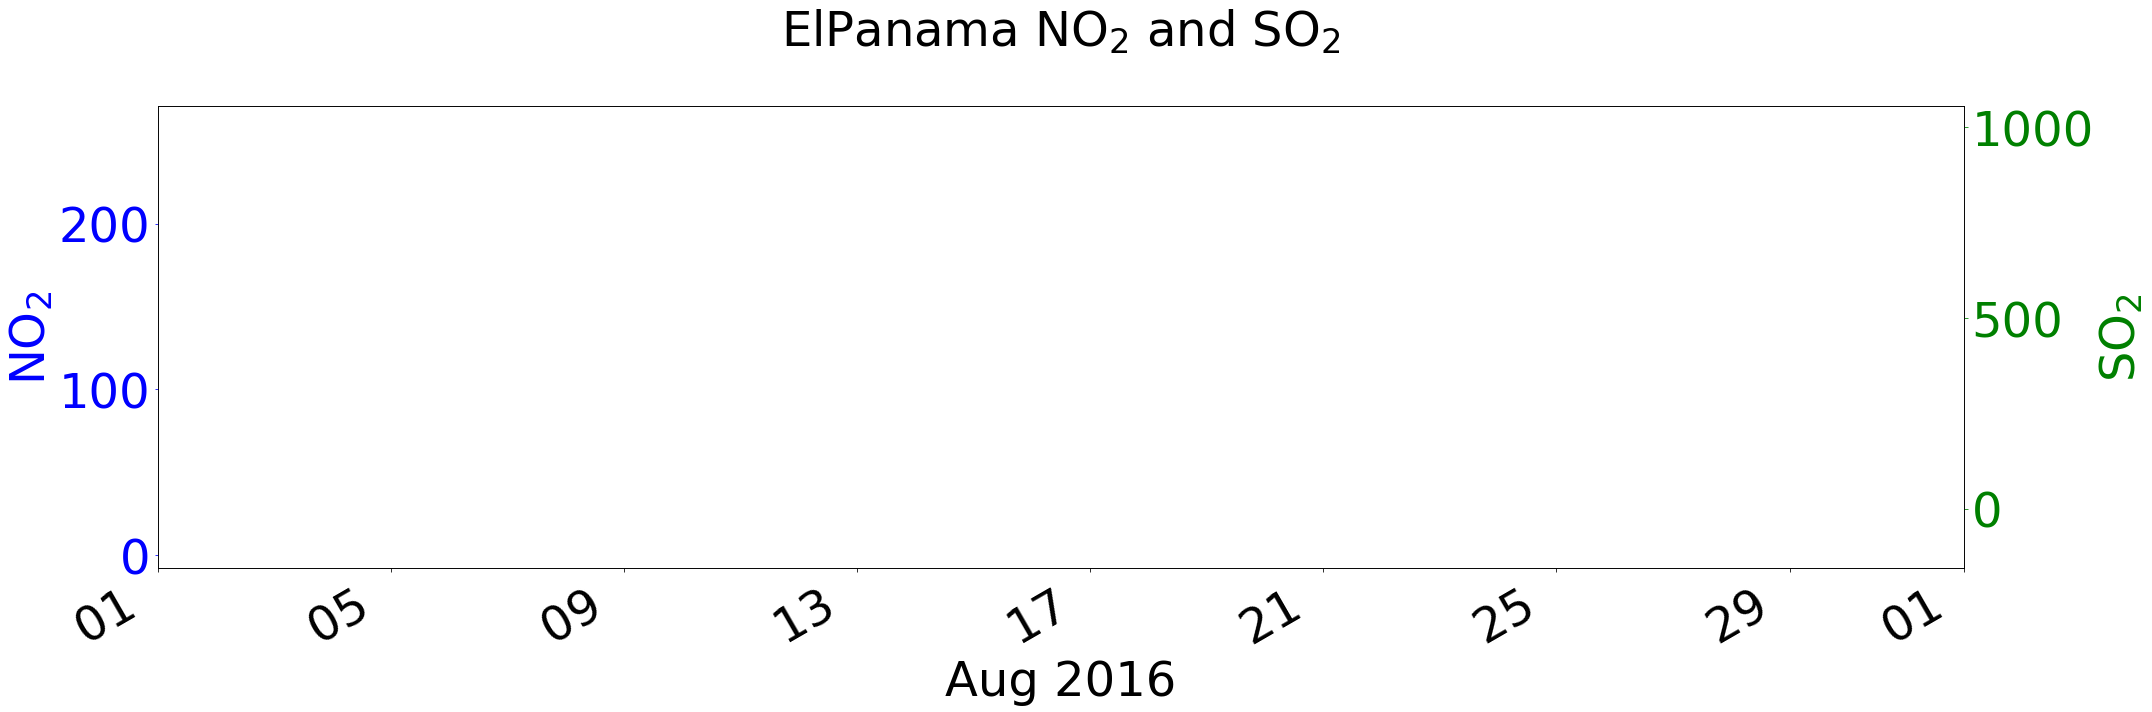

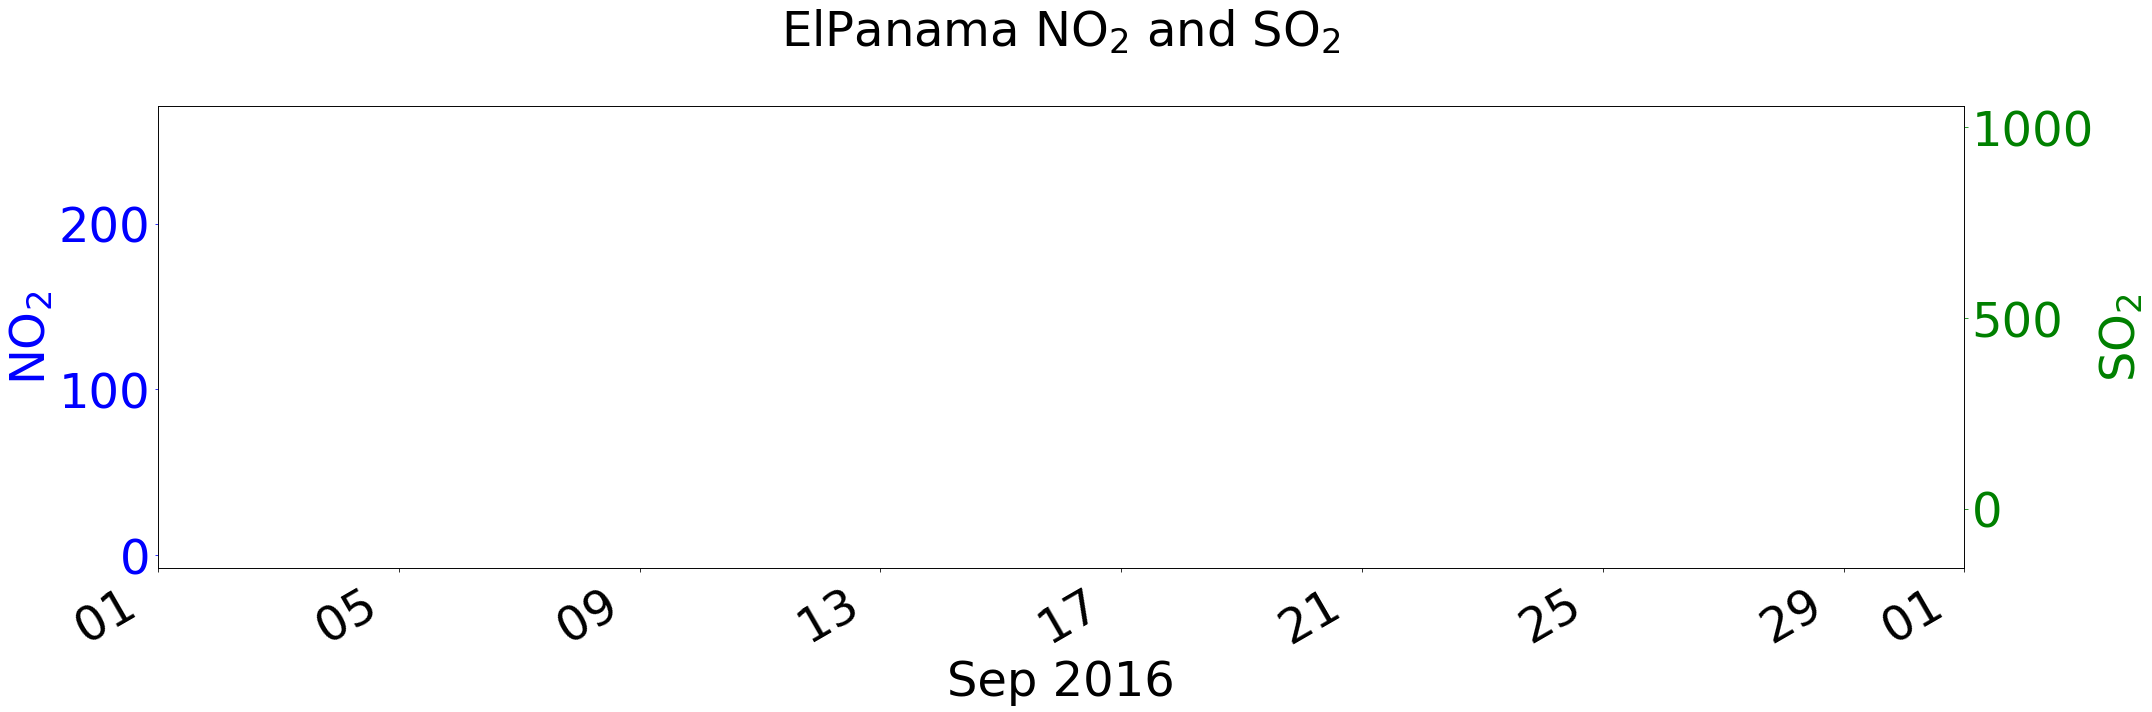

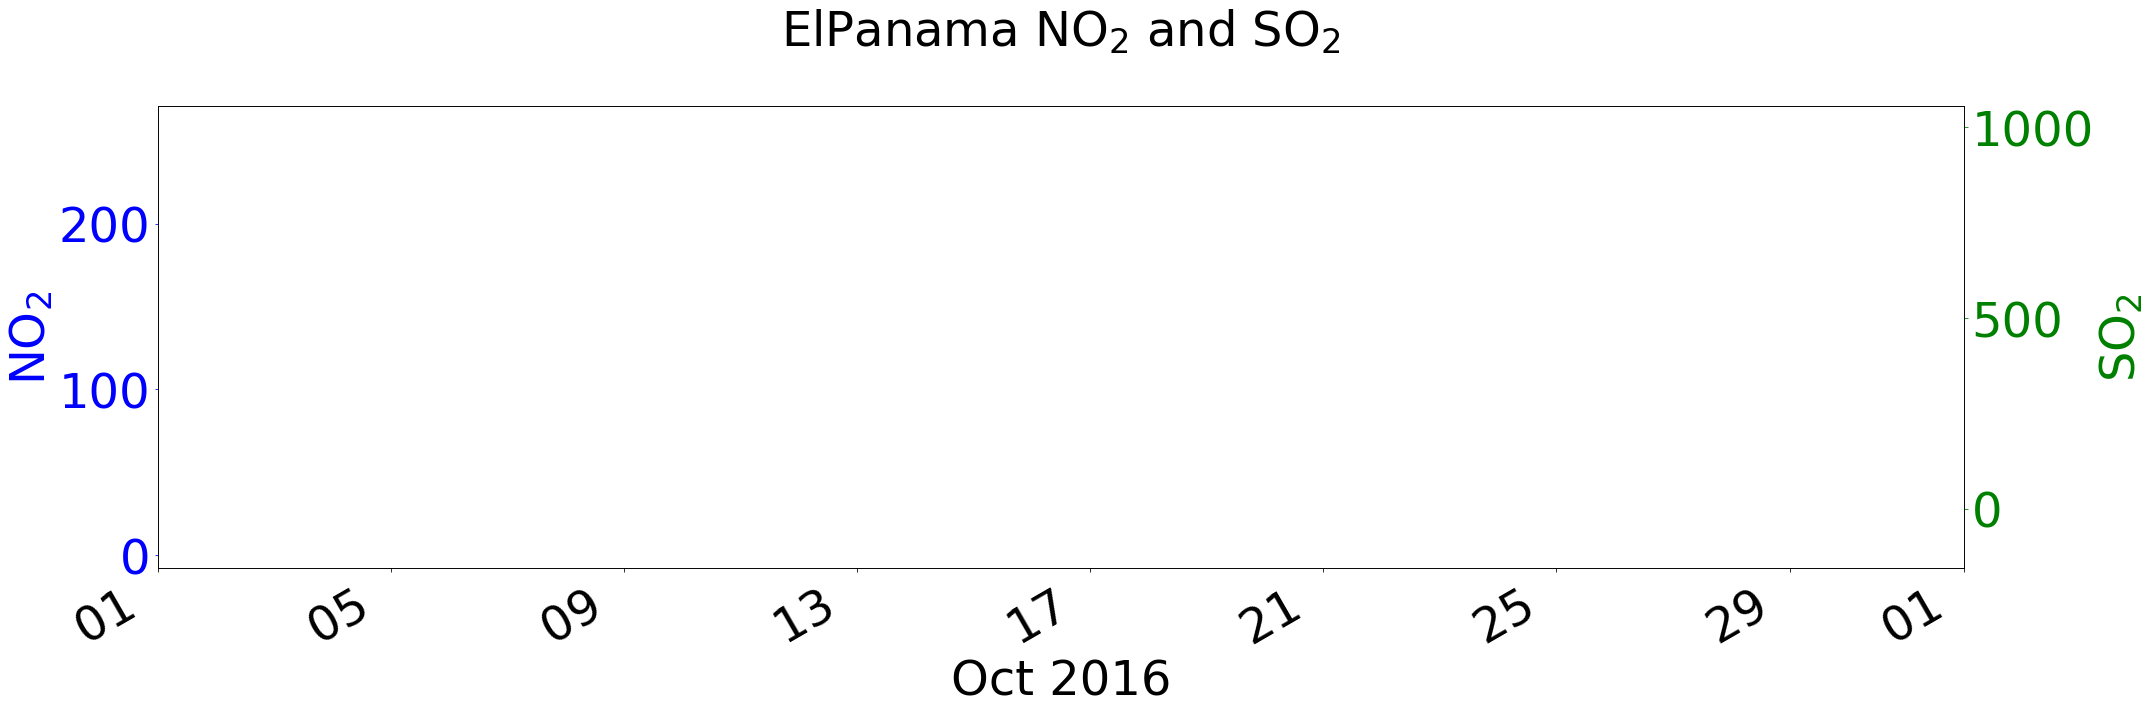

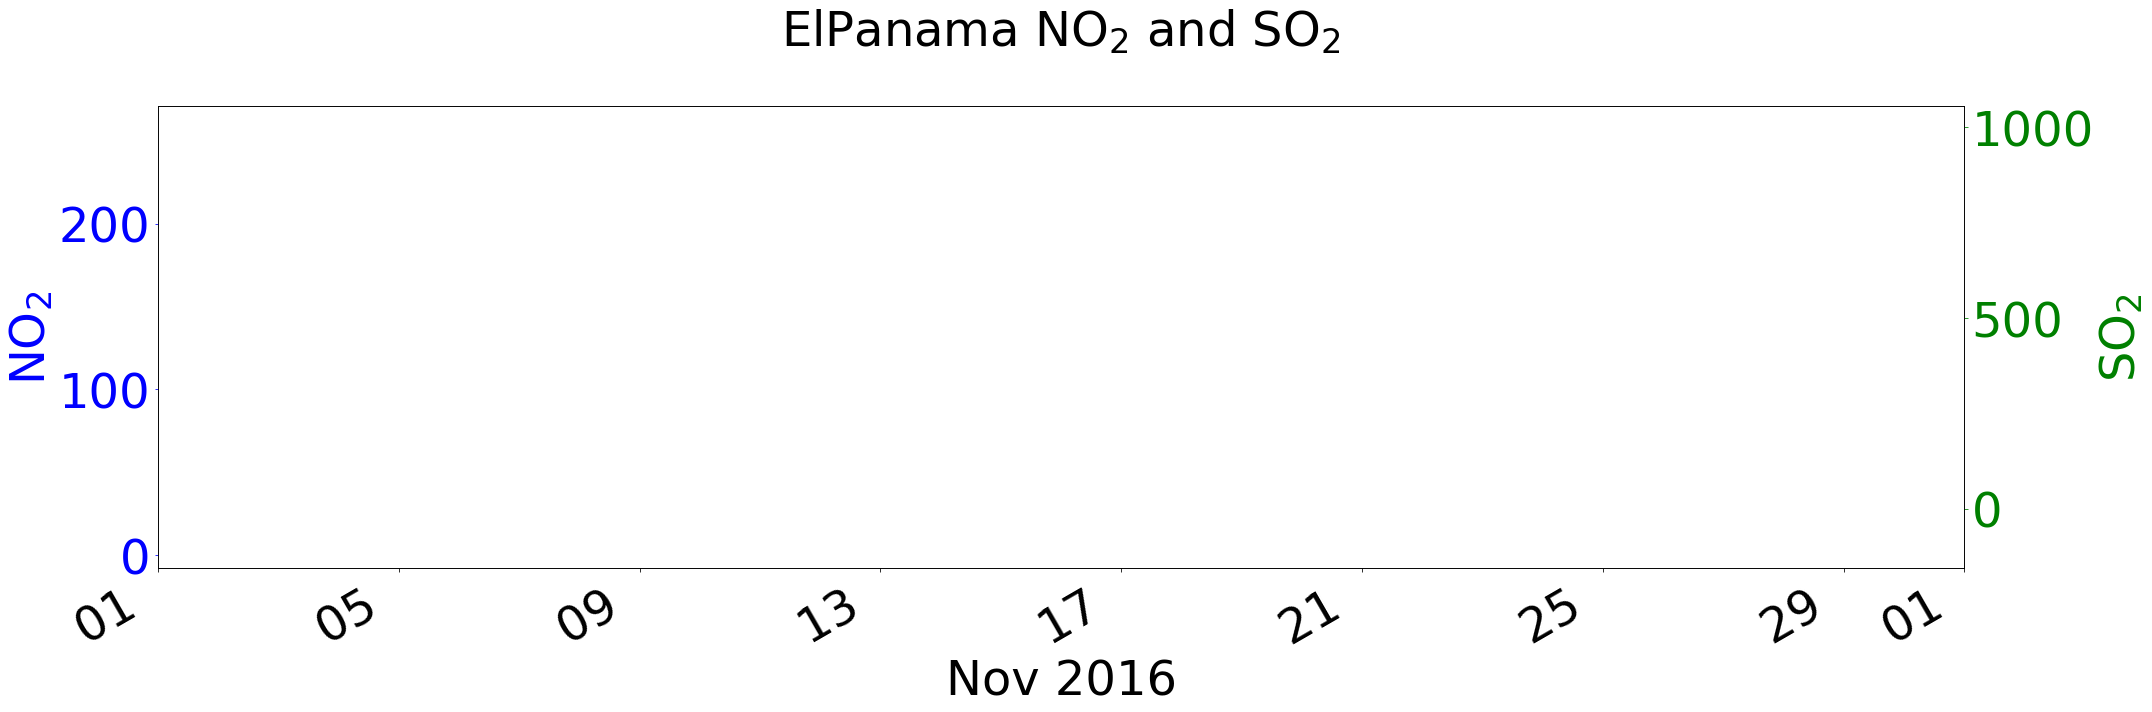

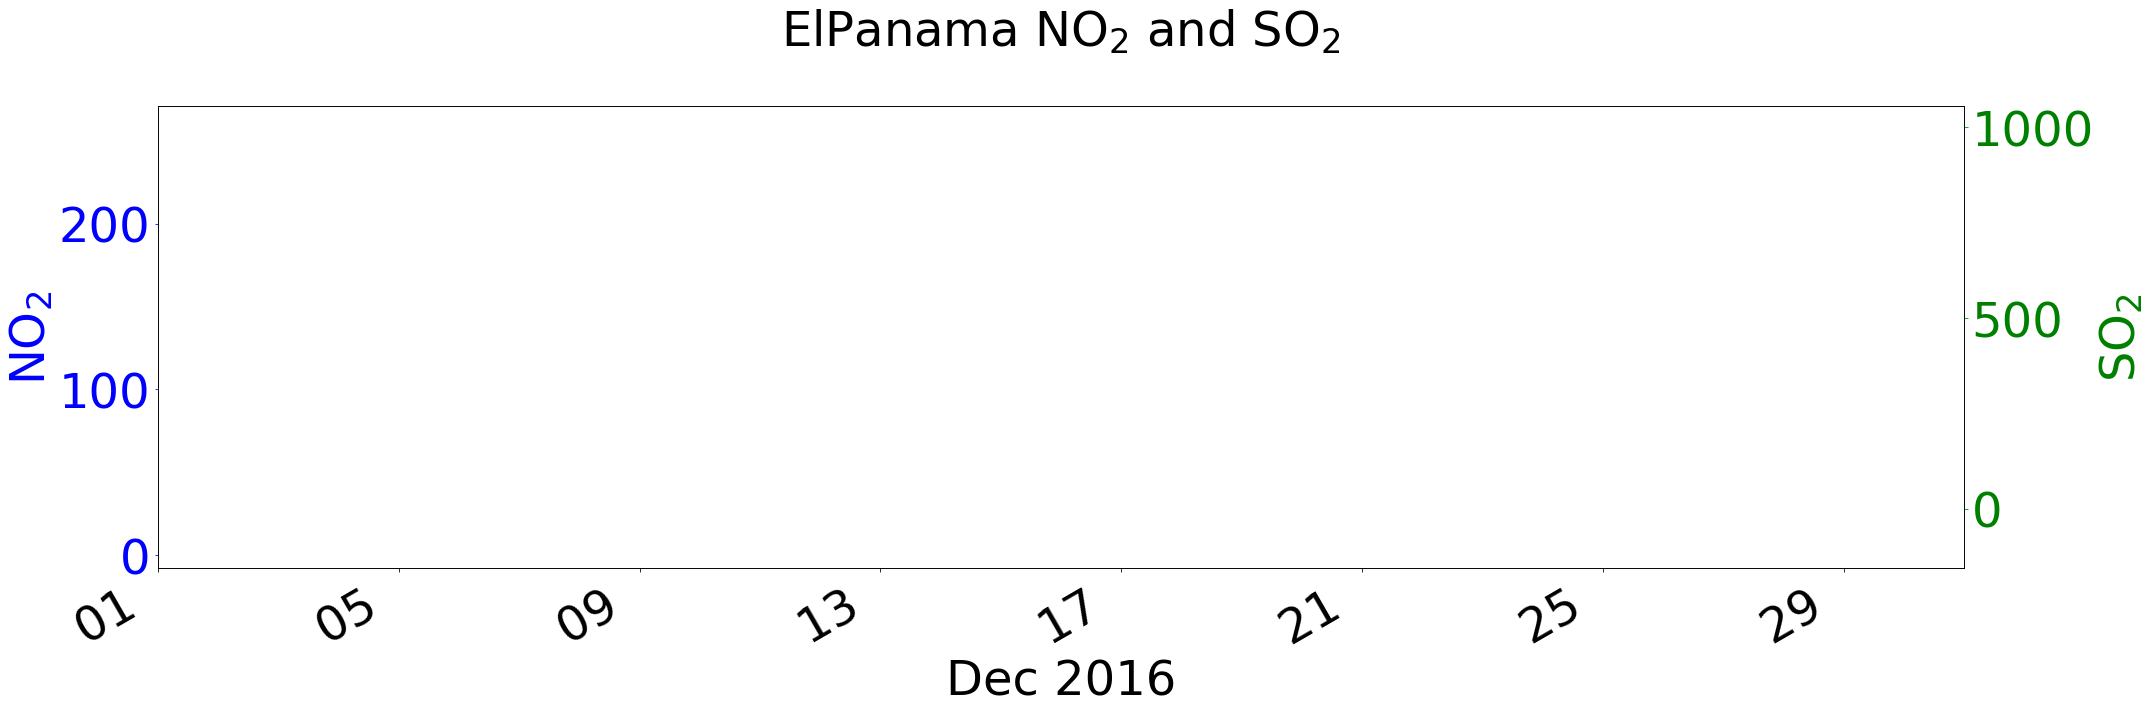

In [3]:
years = [2016, 2017, 2018]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
# NB SName[3] no data
for m in months:
    plotTSNO2(SName[8], month=months[m-1], year=years[0])
